# ECI 2023
## Reconstrucción 3D de humanos a partir de imágenes
### Rodrigo Cárdenas
### Ejercicio 2

# Modelo Lineal Generativo

El objetivo de este ejercicio es construir y analizar un modelo lineal generativo a partir de una pequeña base de datos.

Para ello:
1. Cargar la base de datos de entrenamiento (se provee el código para bajar los meshes en formato .obj abajo)
2. Crear un modelo PCA a partir de los datos. Mantener las K componentes principales que explican el 95% de la varianza.
3. Analizar qué ocurre cuando se varía solamente la primera/segunda/tercera componente principal (visualizar extremos de la distribución).
4. Generar 5 meshes aleatorios.
5. Cargar el sujeto de testing (se provee código), y proyectar al modelo. ¿Cuán bien generaliza el modelo? ¿A qué se debe?


*La base de datos fue obtenida de https://faces.dmi.unibas.ch/bfm/index.php?nav=1-1-1&id=scans (no es necesario bajar de vuelta)*

## Setup

In [31]:
import os
import glob

import trimesh
import numpy as np
from sklearn.decomposition import PCA

In [61]:
!pip install jupyterlab-plotly

ERROR: Could not find a version that satisfies the requirement jupyterlab-plotly (from versions: none)
ERROR: No matching distribution found for jupyterlab-plotly

[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


Bajar base de datos:

## 1. Cargar datos

- Los meshes se encuentran en el directorio 'training-data'.
- Para cargar un mesh: ```trimesh.load('path/to/meshfile.obj')```
- Sugerencia: guardar también la lista de caras, para poder visualizar más adelante.


In [12]:
# path a los datos
path_data = 'data/ej_2'

In [53]:
# carga de datos (vértices y caras)
meshes = np.array([trimesh.load(file_mesh).vertices for file_mesh in glob.glob(path_data+'/training-data/*')])
faces = np.array([trimesh.load(file_mesh).faces for file_mesh in glob.glob(path_data+'/training-data/*')])

In [35]:
meshes_shape = meshes.shape
print(meshes_shape)

(9, 53490, 3)


In [37]:
# versión 'flatten' de los datos para usar con PCA
meshes_flatten = meshes.reshape((meshes_shape[0],meshes_shape[1]*meshes_shape[2]))
print(meshes_flatten.shape)

(9, 160470)


In [40]:
num_examples = meshes_shape[0]
print(num_examples)

9


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [83]:
# viz function
def viz(vertices, faces):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(vertices[:, 0], vertices[:, 1], triangles=faces, Z=vertices[:, 2]) 
    plt.show()

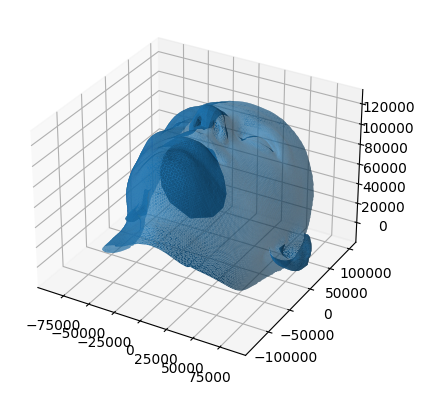

In [84]:
viz(meshes[0],faces[0])

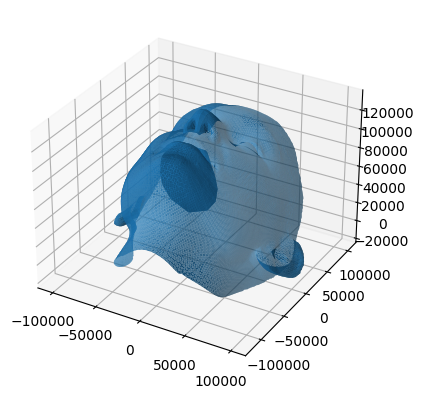

In [82]:
idx = 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(meshes[idx,:, 0], meshes[idx,:, 1], triangles=faces[idx,:], Z=meshes[idx,:, 2]) 
plt.show()

## 2. Construir modelo

Calcular:
- La matriz de componentes principales.
- La cara media.
- La varianza / desviación estándar asociada a cada una de las componentes principales.

Conservar las K primeras componentes principales que explican el 95% de la varianza.

Sugerencia: ver la función 'PCA' de sklearn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [41]:
# ajustar modelo PCA
pca = PCA(n_components=num_examples)
pca.fit(meshes_flatten)

PCA(n_components=9)

In [79]:
# el atributo `components_` es la matriz de componentes principales
pca.components_

(9, 160470)

In [81]:
pca.mean_

array([-56375.18880211,  43301.21180533,  81830.92274311, ...,
        58476.499566  , -24092.02235256, -13241.31000444])

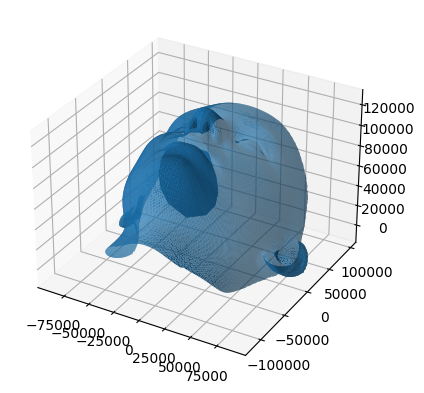

In [85]:
viz(pca.mean_.reshape(meshes_shape[1],meshes_shape[2]),faces[0])

In [86]:
pca.explained_variance_

array([1.49465032e+12, 3.08349517e+11, 2.61197579e+11, 1.41602531e+11,
       1.18611223e+11, 8.14849925e+10, 5.53727383e+10, 2.50062907e+10,
       2.39871930e-18])

In [92]:
np.cumsum(pca.explained_variance_ratio_)

array([0.60116045, 0.72518112, 0.8302369 , 0.88719059, 0.93489698,
       0.9676709 , 0.98994227, 1.        , 1.        ])

Guardar cara media y chequear en meshlab que esté todo bien:

In [ ]:
# save
mesh = trimesh.Trimesh(vertices=mean, faces=F)
mesh.export('mean.obj')

# download
from google.colab import files
files.download('mean.obj')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2. ¿Qué ocurre al variar las primeras tres componentes principales?

Hint:

- Generar vectores latentes (dimensión d) tales que sólo el primer (segundo/tercero) coeficiente sea no-negativo.
- Valor del coeficiente no-negativo: explorar qué pasa en los extremos de la distribución (+- 3 std).
- Reconstruir a partir del vector latente.


In [ ]:
## TO-DO

### 3. Instancias Aleatorias

Generar 5 instancias aleatorias con el modelo.

In [ ]:
# TO-DO

## 4. Generalización

Se provee código que cargar un sujeto no visto por el modelo (mesh con la misma topología, que no se usó en la base de datos de entrenamiento).

Proyectar el scan al modelo, y responder:

- ¿Cuán bien generaliza el modelo? ¿A qué se debe?

Hint: "proyectar" -> obtener el vector latente, y luego reconstruir.




In [ ]:
# Cargar el sujeto de testing:
gdown.download("https://drive.google.com/uc?id=18v7Xf5vKpX7aXhz6TNkFodxfvvRs-5uo", "test-mesh.obj", quiet=False)
test_mesh = trimesh.load('test-mesh.obj')
test_vertices = np.array(test_mesh.vertices)

In [ ]:
# TO-DO